# Topic Modeling

In [1]:
import pandas as pd

In [2]:
from data_describe.text.topic_modeling import topic_model

In [3]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

In [4]:
df = pd.DataFrame({"text": newsgroups_train['data']})

In [5]:
df.head()

,text
0,From: darice@yoyo.cc.monash.edu.au (Fred Rice)...
1,From: chrisb@tafe.sa.edu.au (Chris BELL)\nSubj...
2,Subject: Re: The Inimitable Rushdie\nFrom: kma...
3,From: timmbake@mcl.ucsb.edu (Bake Timmons)\nSu...
4,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...


## Explicitly providing number of topics

In [6]:
lda_model = topic_model(df.text, num_topics=2)
lda_model

,Topic 1,Topic 1 Coefficient Value,Topic 2,Topic 2 Coefficient Value
Term 1,|>,0.017,|>,0.010
Term 2,>>,0.013,God,0.007
Term 3,:,0.013,-,0.005
Term 4,God,0.005,evidence,0.004
Term 5,-,0.004,:,0.004
Term 6,atheists,0.004,moral,0.004
Term 7,those,0.004,our,0.004
Term 8,|,0.004,these,0.004
Term 9,A,0.003,Jesus,0.003
Term 10,had,0.003,them,0.003


## Guess optimal number of topics and show elbow plot

In [7]:
%%time
lda_model = topic_model(df.text, num_topics=None, min_topics=2, max_topics=4)
lda_model

Fitting topic model: 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]

CPU times: user 9.64 s, sys: 260 ms, total: 9.9 s
Wall time: 4.73 s


,Topic 1,Topic 1 Coefficient Value,Topic 2,Topic 2 Coefficient Value,Topic 3,Topic 3 Coefficient Value,Topic 4,Topic 4 Coefficient Value
Term 1,>>,0.019,God,0.009,|>,0.042,:,0.014
Term 2,:,0.009,-,0.006,:,0.010,>>,0.008
Term 3,|>,0.006,argument,0.005,-,0.005,God,0.006
Term 4,-,0.005,evidence,0.004,God,0.005,them,0.005
Term 5,atheists,0.005,our,0.004,|,0.005,evidence,0.004
Term 6,God,0.004,moral,0.004,(Jon,0.005,Jesus,0.004
Term 7,had,0.004,these,0.004,Livesey),0.004,our,0.004
Term 8,those,0.004,Islamic,0.004,moral,0.004,those,0.004
Term 9,its,0.004,had,0.004,livesey@solntze.wpd.sgi.com,0.004,these,0.003
Term 10,A,0.004,For,0.004,it.,0.004,read,0.003


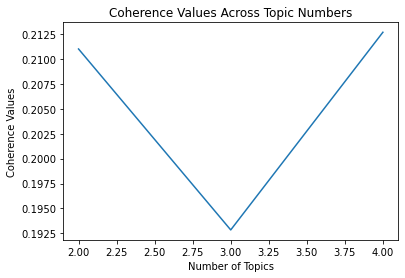

<Figure size 720x720 with 0 Axes>

In [8]:
lda_model.elbow_plot()